<a href="https://colab.research.google.com/github/jhmacario/Desafio-Success-Enterprises/blob/main/Analise_de_Dados_Success_Enterprises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQds3Lx61A0Cn40DiHVyMiGx1iek7LklMo1TQmEbJA2mAsHXAqUpXg3FEW-jzhmvVuf1Q&usqp=CAU)

#**Análise de Dados da Success Enterprises**

*Por Jhon R. Macario* 


##**Contexto**

A *Success Enterprises* está avaliando seus concorrentes com produção internacional. Nair, a gestora da área de inteligência, optou por primeiramente entender as importações brasileiras nos segmentos de máquina de lavar roupa e fogões, produtos que a *Success Enterprises* fabrica e é líder de mercado. Nair baixou alguns dados da **Receita Federal** (Siscori), organizando e filtrando as colunas de interesse. Contudo, infelizmente, surgiu uma demanda urgente dentro da empresa e ela pediu para que você assumisse a análise.

## **1. Configurações** 

In [33]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Permitindo a visualização de todas as colunas
pd.options.display.max_columns = None

## **2. Limpeza e organização**

Q1. Importe o arquivo ’importacao_siscori.csv’.

(Dica: tente importar a coluna ’codigo_pedido’como string/character.)

Q2. Organize as colunas ‘anomes’, ‘cod_ncm’ e ‘codigo_pedido’:

    (a)  Transforme a coluna ‘anomes’ (ano+mês) em uma coluna de data, no formato YYYY/MM/DD e tenha a classe data.

    (b)  Renomeie os códigos da coluna ‘cod_ncm’, utilizando o seguinte mapeamento:

          i. Fogões = 73211100

          ii. Máquina de lavar roupa inferior a 10 kg = 84501100

          iii. Máquina de lavar roupa superior a 10 kg = 84502090

    (c) Dada a particularidade da base, retire os últimos 5 dígitos da coluna ’codigo_pedido’. Você notará que haverá linhas repetidas. Nesses casos, mantenha apenas uma delas.

In [3]:
# Importando os dados do repositório do GitHub
dados_siscori = "https://raw.githubusercontent.com/jhmacario/Desafio-Success-Enterprises/main/importacao_siscori.csv"

# Lendo o arquivo
df = pd.read_csv(dados_siscori, encoding='latin-1')

# Mostrando as 5 primeiras entradas do conjunto de dados
df.head()

,codigo_pedido,anomes,cod_ncm,pais,pais_de_origem,pais_1,pais_de_aquisicao,descricao_do_produto,qtd_total_pedido,unidade_desembaraco
0,1043210000100001,201601,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","FOGÃO DE COZINHA, A GAS (GLP), TIPO DE MESA (C...",280.0,PORTO DE PARANAGUA
1,1042990000100001,201601,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","COOKTOP A GÁS GLP, COM 5 QUEIMADORES, COM POTÊ...",280.0,PORTO DE PARANAGUA
2,1043470000100001,201601,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","FOGÃO DE COZINHA, A GAS (GLP), TIPO DE MESA (C...",1136.0,PORTO DE PARANAGUA
3,1086220000700002,201601,73211100,399,JAPAO,399,JAPAO,CHURRASQUEIRA A GAS - GLP - REF: RGA-406B ...,2.0,PORTO DE SANTOS
4,1086220000700001,201601,73211100,399,JAPAO,399,JAPAO,CHURRASQUEIRA A GAS - GN - REF: RGA-406B ...,2.0,PORTO DE SANTOS


In [4]:
# Mostrando o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

Formato do DataFrame:  (14166, 10)


In [5]:
# Identificando o tipo de cada variável
display(df.dtypes)

codigo_pedido             int64
anomes                    int64
cod_ncm                   int64
pais                      int64
pais_de_origem           object
pais_1                    int64
pais_de_aquisicao        object
descricao_do_produto     object
qtd_total_pedido        float64
unidade_desembaraco      object
dtype: object

In [6]:
# Convertendo a coluna 'codigo_pedido' para o tipo string
df['codigo_pedido'] = df['codigo_pedido'].astype(str)
df['codigo_pedido'].dtypes

dtype('O')

In [7]:
# Formatando a data
df['anomes'] = pd.to_datetime(df['anomes'], format='%Y%m')
df['anomes'].dt.strftime('%Y/%m')

df.head()

,codigo_pedido,anomes,cod_ncm,pais,pais_de_origem,pais_1,pais_de_aquisicao,descricao_do_produto,qtd_total_pedido,unidade_desembaraco
0,1043210000100001,2016-01-01,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","FOGÃO DE COZINHA, A GAS (GLP), TIPO DE MESA (C...",280.0,PORTO DE PARANAGUA
1,1042990000100001,2016-01-01,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","COOKTOP A GÁS GLP, COM 5 QUEIMADORES, COM POTÊ...",280.0,PORTO DE PARANAGUA
2,1043470000100001,2016-01-01,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","FOGÃO DE COZINHA, A GAS (GLP), TIPO DE MESA (C...",1136.0,PORTO DE PARANAGUA
3,1086220000700002,2016-01-01,73211100,399,JAPAO,399,JAPAO,CHURRASQUEIRA A GAS - GLP - REF: RGA-406B ...,2.0,PORTO DE SANTOS
4,1086220000700001,2016-01-01,73211100,399,JAPAO,399,JAPAO,CHURRASQUEIRA A GAS - GN - REF: RGA-406B ...,2.0,PORTO DE SANTOS


In [8]:
# Renomeando os códigos da coluna cod_ncm
for linha in df['cod_ncm']:
  # i. Fogões
  if (linha == 73211100):
    df['cod_ncm'] = df['cod_ncm'].replace(73211100, 'Fogões')
  # ii. Máquina de lavar roupa inferior a 10kg
  elif (linha == 84501100):
    df['cod_ncm'] = df['cod_ncm'].replace(84501100, 'Máquina de lavar roupa inferior a 10kg')
  # iii. Máquina de lavar roupa superior a 10kg
  elif (linha == 84502090):
    df['cod_ncm'] = df['cod_ncm'].replace(84502090, 'Máquina de lavar roupa superior a 10kg')

In [9]:
# Para cada linha da coluna 'codigo_pedido', remove os últimos 5 dígitos da string
df['codigo_pedido'] = df.apply(lambda x: x['codigo_pedido'][:-5], axis = 1)

In [10]:
# Remove as colunas com duplicatas
df.drop_duplicates(subset ='codigo_pedido', keep = False, inplace = True)

df.shape

(4936, 10)

## **3. Análise Exploratória de Dados**

Q1. Qual produto tem maior participação ao considerarmos as séries históricas de importação?

Q2. Como se dá a dinâmica, ao longo do tempo, das séries para cada produto? Descreva.

Q3 Há diferença na participação dos países exportadores quando olhamos para ’pais_de_origem’ ou para ’pais_de_aquisicao’?

In [11]:
# Mostrando a distribuição estatística dos dados
df.describe()

,pais,pais_1,qtd_total_pedido
count,4936.000000,4936.000000,4936.000000
mean,211.549230,240.121759,212.810033
std,135.602231,135.516972,464.299577
min,23.000000,23.000000,1.000000
25%,160.000000,190.000000,69.000000
50%,160.000000,190.000000,153.000000
75%,190.000000,190.000000,153.000000
max,858.000000,858.000000,11982.000000


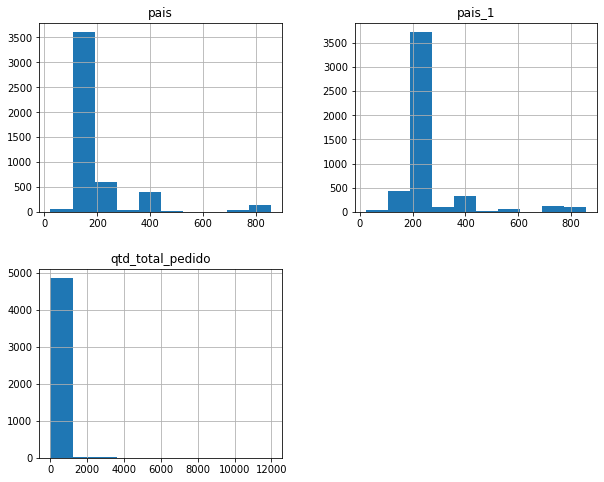

In [12]:
# Mostrando o histograma das variáveis numéricas
df.hist(figsize=(10,8));

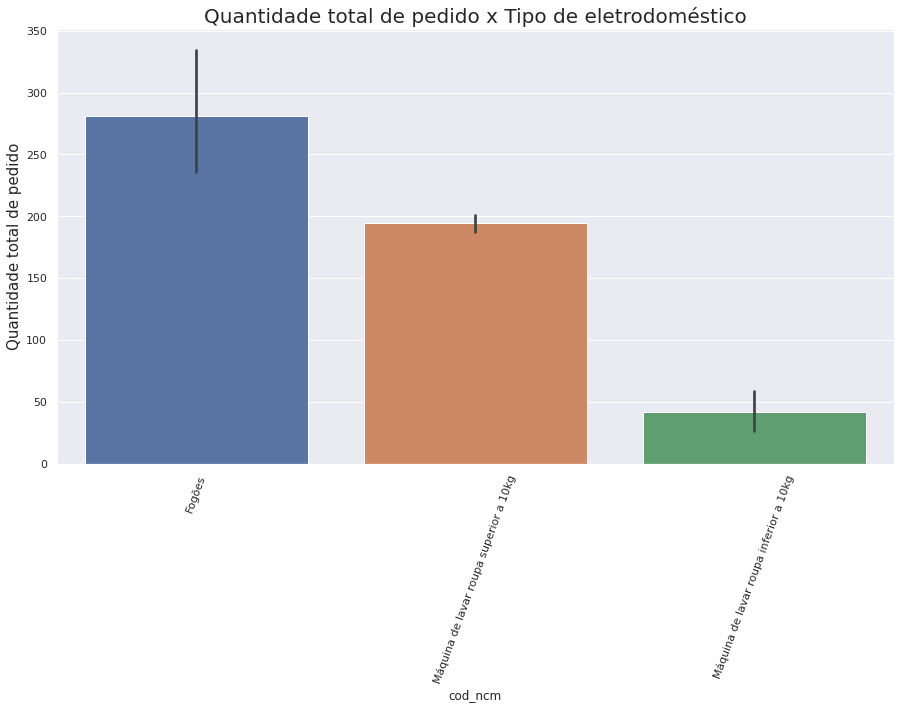

In [51]:
ax = sns.barplot(x=df['cod_ncm'], y=df['qtd_total_pedido'], data=df)

# Configurando a figura
plt.xticks(rotation=70)
sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("Quantidade total de pedido", size=15)
plt.title("Quantidade total de pedido x Tipo de eletrodoméstico", size=20);

In [ ]:
# Média de pedido por produto
df[['qtd_total_pedido', 'cod_ncm']].groupby(['cod_ncm']).mean()

,qtd_total_pedido
cod_ncm,
Fogões,280.846512
Máquina de lavar roupa inferior a 10kg,41.682353
Máquina de lavar roupa superior a 10kg,194.337298


###**Analisando quantidade de pedidos por países**

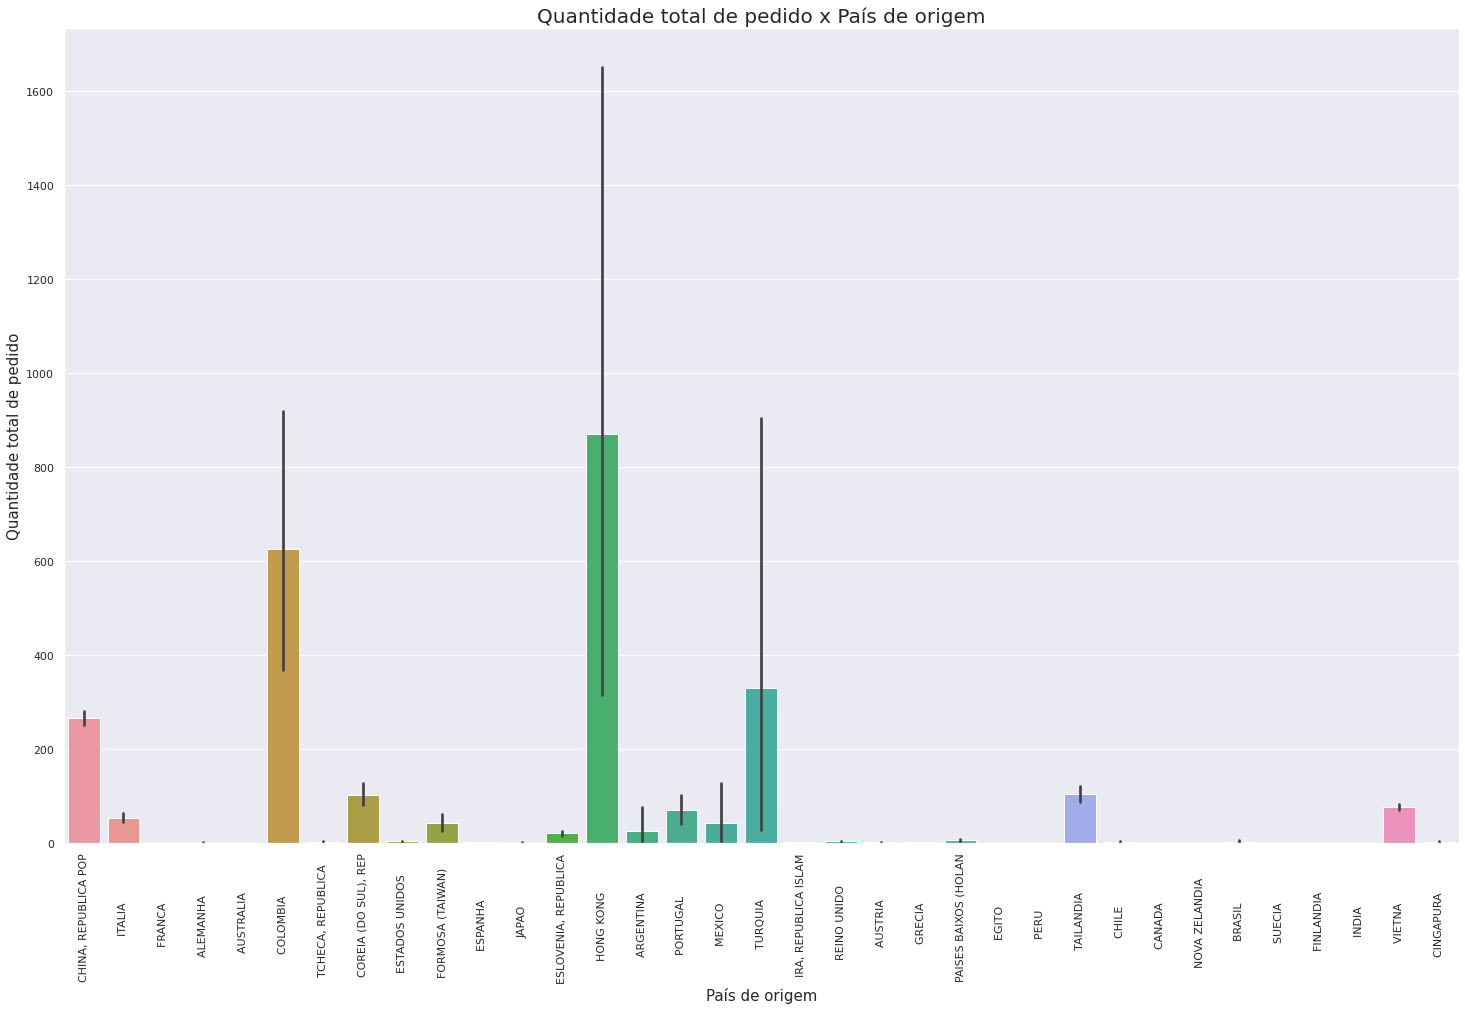

In [25]:
# Plotando total de pedido por país de origem
ax = sns.barplot(x=df['pais_de_origem'], y=df['qtd_total_pedido'], data=df)

# Configurando a figura
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(25,15)})
plt.xlabel("País de origem", size=15)
plt.ylabel("Quantidade total de pedido", size=15)
plt.title("Quantidade total de pedido x País de origem", size=20);

In [52]:
# Total de pedido por país de origem
df[['qtd_total_pedido', 'pais_de_origem']].groupby(['pais_de_origem']).mean()

,qtd_total_pedido
pais_de_origem,
ALEMANHA,1.428571
ARGENTINA,26.062500
AUSTRALIA,1.000000
AUSTRIA,2.000000
BRASIL,2.750000
CANADA,1.000000
CHILE,2.500000
"CHINA, REPUBLICA POP",266.217567
CINGAPURA,2.500000


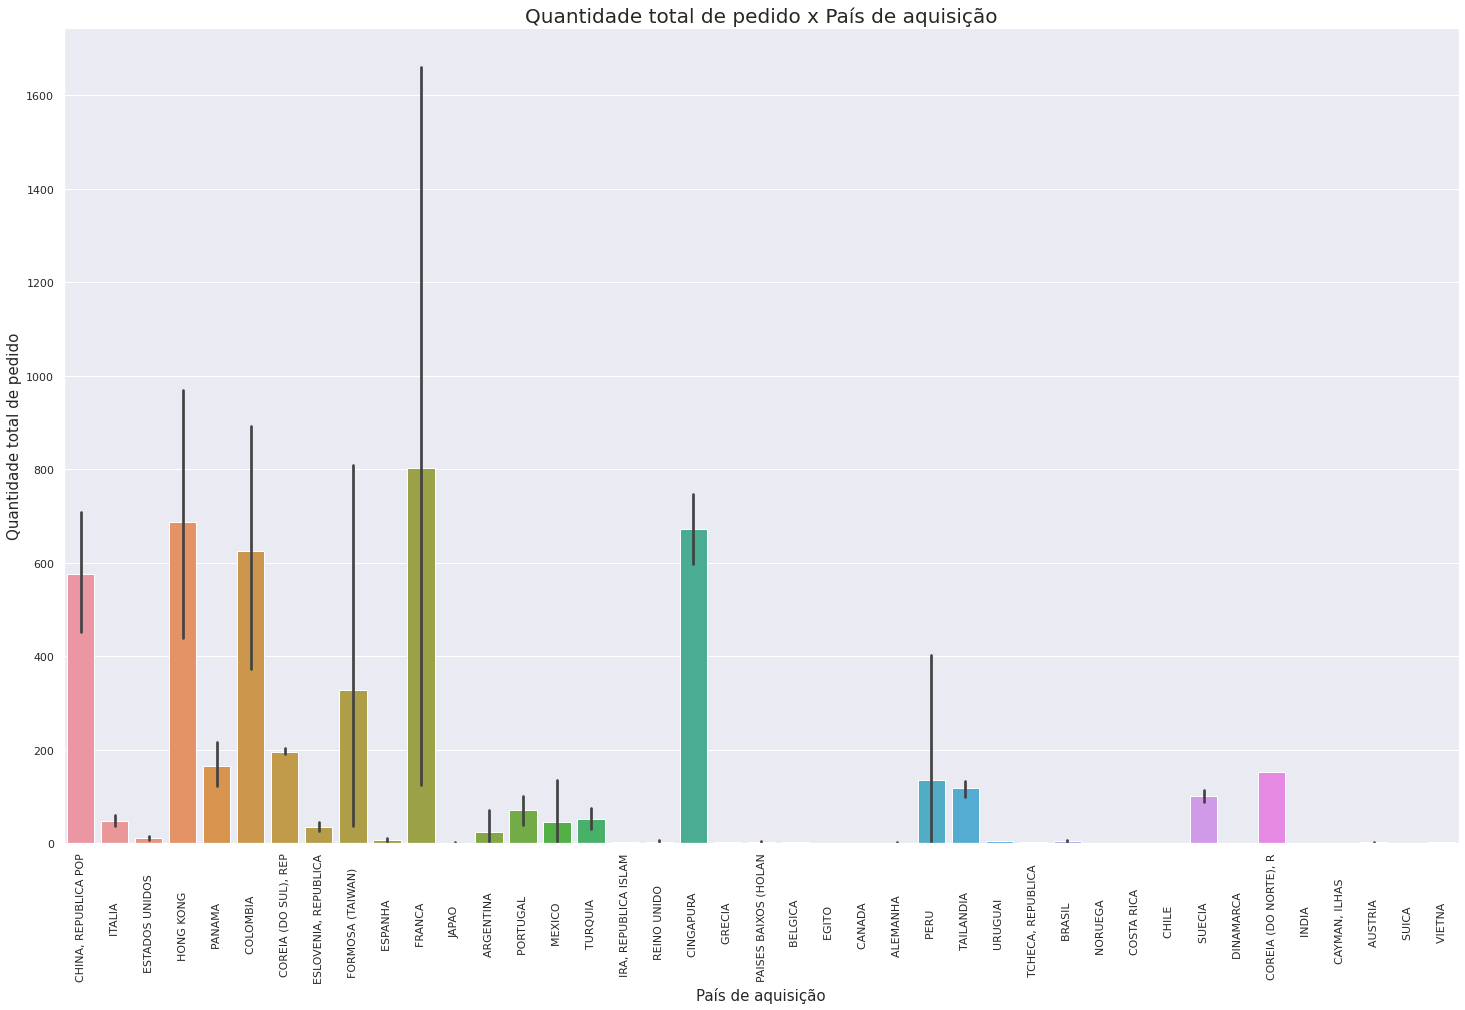

In [ ]:
# Plotando total de pedido por país de aquisição
ax = sns.barplot(x=df['pais_de_aquisicao'], y=df['qtd_total_pedido'], data=df)

# Configurando a figura
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(25,15)})
plt.xlabel("País de aquisição", size=15)
plt.ylabel("Quantidade total de pedido", size=15)
plt.title("Quantidade total de pedido x País de aquisição", size=20);

In [54]:
# Total de pedido por país de aquisição
df[['qtd_total_pedido', 'pais_de_aquisicao']].groupby(['pais_de_aquisicao']).mean()

,qtd_total_pedido
pais_de_aquisicao,
ALEMANHA,1.571429
ARGENTINA,24.647059
AUSTRIA,2.000000
BELGICA,3.000000
BRASIL,4.500000
CANADA,1.000000
"CAYMAN, ILHAS",1.000000
CHILE,1.200000
"CHINA, REPUBLICA POP",575.274725


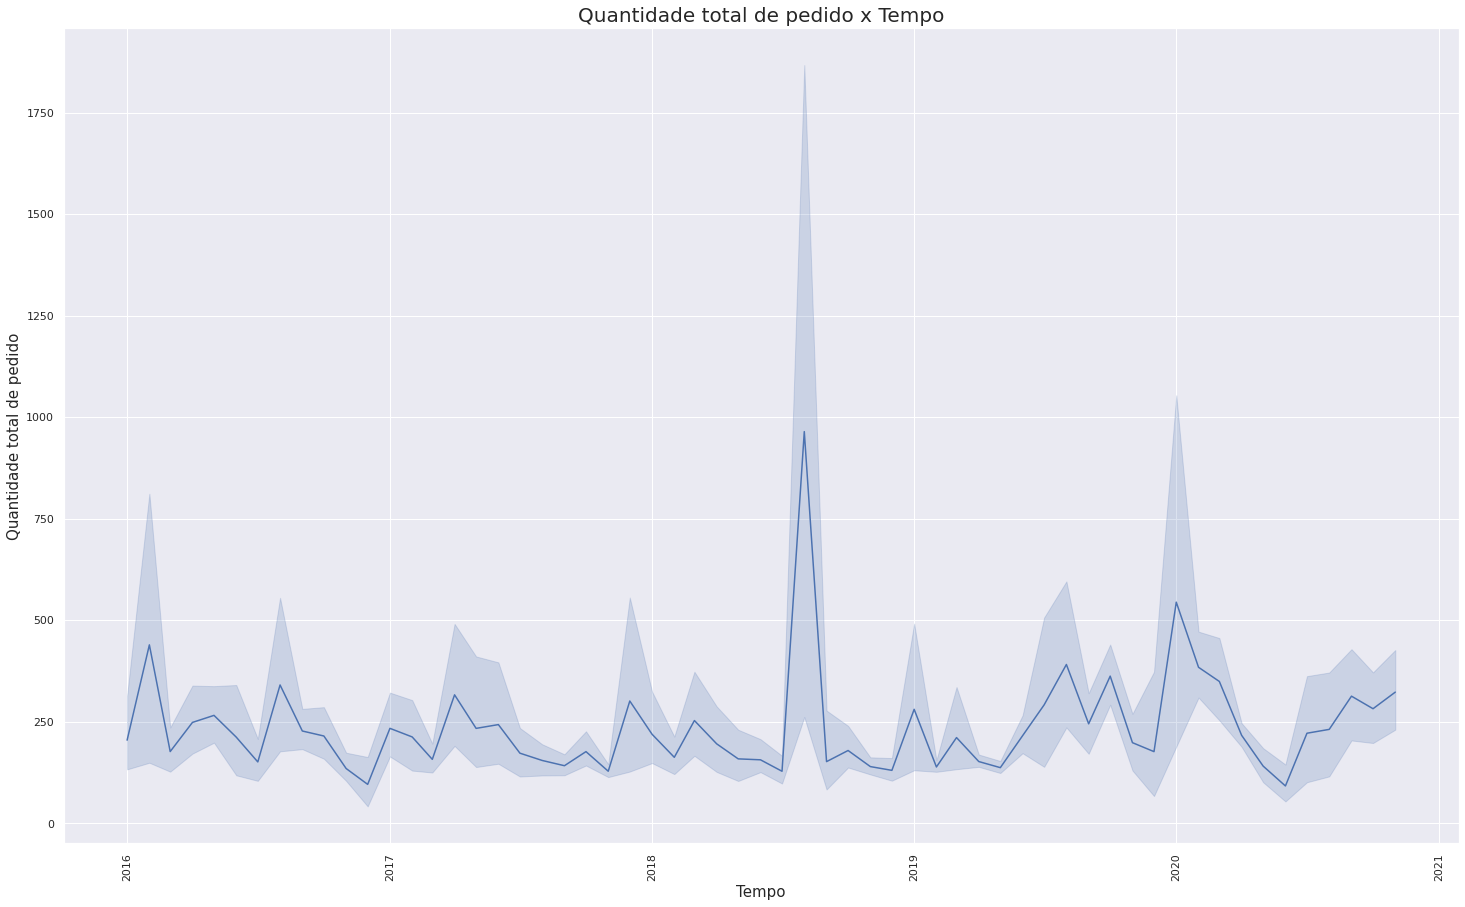

In [69]:
sns.lineplot(x="anomes", y="qtd_total_pedido", data=df)
plt.xticks(rotation=15)

# Configurando a figura
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(25,15)})
plt.xlabel("Tempo", size=15)
plt.ylabel("Quantidade total de pedido", size=15)
plt.title("Quantidade total de pedido x Tempo", size=20);
plt.show()  

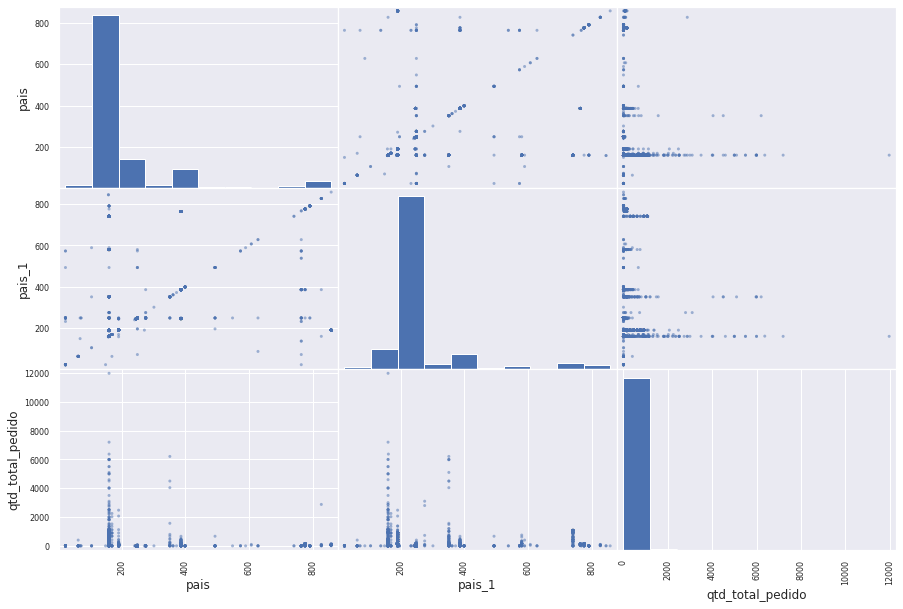

In [26]:
# Plotando uma scatter matrix
pd.plotting.scatter_matrix(df, figsize=(15, 10));

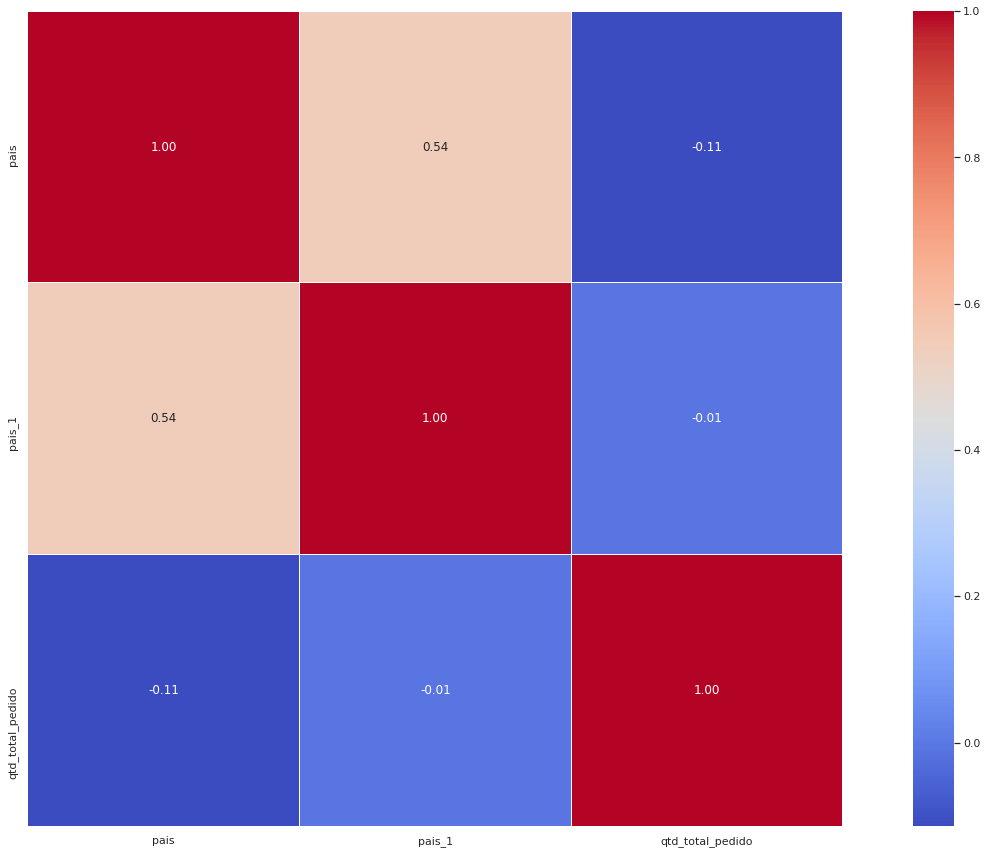

In [27]:
# Plotando o heatmap para as variáveis numéricas
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [28]:
df.describe(include=['O'])

,codigo_pedido,cod_ncm,pais_de_origem,pais_de_aquisicao,descricao_do_produto,unidade_desembaraco
count,4936,4936,4936,4936,4936,4936
unique,4936,3,35,41,1600,48
top,10982200001,Máquina de lavar roupa superior a 10kg,"CHINA, REPUBLICA POP","COREIA (DO SUL), REP",WD11M44530W/AZ - LAVA E SECA SAMSUNG COM CAPAC...,PORTO DE SANTOS
freq,1,3647,3559,3237,251,3108


In [29]:
# Vendo a porcentagem valores faltantes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

unidade_desembaraco     0.0
qtd_total_pedido        0.0
descricao_do_produto    0.0
pais_de_aquisicao       0.0
pais_1                  0.0
pais_de_origem          0.0
pais                    0.0
cod_ncm                 0.0
anomes                  0.0
codigo_pedido           0.0
dtype: float64

## **4. Bônus: Profile Report**

In [ ]:
!pip install -U pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Profiling Siscori',html={'style':{'full_width':True}})

In [ ]:
profile.to_file(output_file="analise-de-dados-success-enterprise.html")